In [1]:
#✅ STEP-BY-STEP Naive Bayes Lengkap

In [2]:
#🔧 1. Import Semua Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
#📥 2. Load & Lihat Data
# Path file CSV Anda
file_path = r'C:/Users/sugih/Downloads/Sugiyanto_4123042_NaivaBayes1/Review1CSV.csv'
# Baca file CSV
df = pd.read_csv(file_path, quotechar='"', skipinitialspace=True)
# Tampilkan 5 baris pertama
print(df.head())
# Cek kolom & null
print(df.columns)
print(df.info())
print(df.isnull().sum())

                                                  No  \
0                                                  1   
1                                                  2   
2  3,"Packing aman, puas banget",Positif,2025-02-...   
3  4,"Pelayanan memuaskan, recommended",Positif,2...   
4  5,"Pengiriman cepat, barang mantap",Positif,20...   

                                     Review    Label     Tanggal  Rating  
0  Barang cepat sampai dan sesuai deskripsi  Positif  2025-04-02     4.0  
1           Penjual ramah dan respons cepat  Positif  2025-03-20     4.0  
2                                       NaN      NaN         NaN     NaN  
3                                       NaN      NaN         NaN     NaN  
4                                       NaN      NaN         NaN     NaN  
Index(['No', 'Review', 'Label', 'Tanggal', 'Rating'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
-

In [4]:
#🧼 3. Data Cleaning (Opsional Tapi Disarankan)
# Ambil hanya kolom yang diperlukan
df = df[['Review', 'Label']]
df['Review'] = df['Review'].astype(str)

# Pembersihan teks dasar
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+", "", text)  # hapus link
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # hapus angka dan tanda baca
    text = re.sub(r"\s+", " ", text)  # hapus spasi berlebih
    return text.strip()

df['Clean_Review'] = df['Review'].apply(clean_text)

In [5]:
#🔡 4. Encode Label (Positif/Negatif)
le = LabelEncoder()
df['Label_encoded'] = le.fit_transform(df['Label'])
# Cek hasil encoding
print(df[['Label', 'Label_encoded']].drop_duplicates())

       Label  Label_encoded
0    Positif              2
2        NaN              3
69   Negatif              0
136   Netral              1


In [6]:
#🔀 5. Split Data Train/Test
X = df['Clean_Review']
y = df['Label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

In [7]:
#🧠 6. TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
#🤖 7. Latih Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [9]:
#📊 8. Evaluasi Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred = model.predict(X_test_tfidf)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Presisi:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
# Konversi target_names ke string agar tidak error
target_names = [str(cls) for cls in le.classes_]
# Laporan lengkap per kelas
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Akurasi: 0.9192546583850931
Presisi: 0.9187605872388482
Recall: 0.9192546583850931
F1 Score: 0.9183047131896237

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.82      0.88      0.85        41
      Netral       1.00      1.00      1.00        29
     Positif       0.79      0.70      0.75        27
         nan       1.00      1.00      1.00        64

    accuracy                           0.92       161
   macro avg       0.90      0.90      0.90       161
weighted avg       0.92      0.92      0.92       161



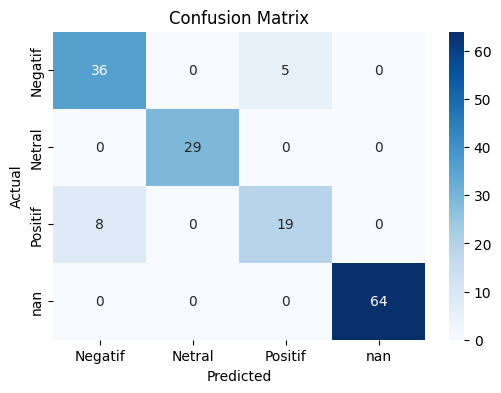

In [10]:
#🧱 9. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
#🧪 10. Prediksi Review Baru
new_reviews = [
    "Sangat memuaskan, cepat dan berkualitas",
    "Saya kecewa, barang tidak sesuai",
    "Produk bagus, sesuai deskripsi",
    "Pengiriman lama dan pelayanan buruk"
]
# Bersihkan teks juga
new_reviews_clean = [clean_text(text) for text in new_reviews]
new_reviews_vec = vectorizer.transform(new_reviews_clean)
predicted_labels = model.predict(new_reviews_vec)
decoded_labels = le.inverse_transform(predicted_labels)
for review, label in zip(new_reviews, decoded_labels):
    print(f"'{review}' => Sentimen: {label}")

'Sangat memuaskan, cepat dan berkualitas' => Sentimen: Positif
'Saya kecewa, barang tidak sesuai' => Sentimen: Netral
'Produk bagus, sesuai deskripsi' => Sentimen: Netral
'Pengiriman lama dan pelayanan buruk' => Sentimen: Negatif


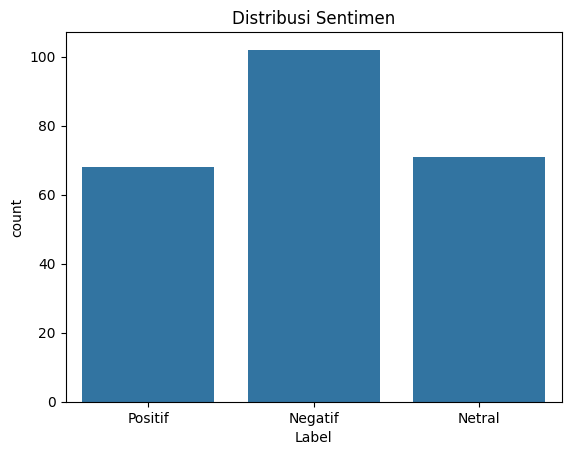

In [12]:
#📈 11. (Opsional) Distribusi Data
sns.countplot(x='Label', data=df)
plt.title("Distribusi Sentimen")
plt.show()

In [13]:
#🧾 Penutup
#Dengan langkah ini, Anda sudah melakukan end-to-end pipeline Naive Bayes klasifikasi review:
#Cleaning
#Preprocessing
#TF-IDF
#Training
#Evaluation
#Prediction